## Images and Perceptrons
### Kaylee Cho
**Feb 19, 2024**

**bitmap images** the goals...!
1. give more experience with working with bitmap images
2. improve your understanding about how feed-forward (dense layers) of neural networks work
3. demonstrate how to plement a feed-forward neural network
4. show what are the concolutional network layers doing.

### 1. Krazy Kat
**1.1 Rotate Krazy Kat**

shape: (432, 482)


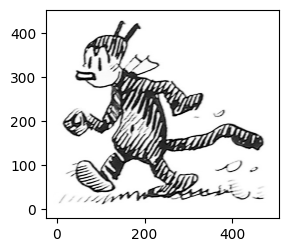

In [1]:
import pandas as pd
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

img = imread(r'C:\Users\pc\OneDrive\바탕 화면\INFO 371\jupyter\data\krazy-kat.png')

# note: rows * columns (not width * height!)
print("shape:", img.shape)
## create coordinate matrix
xx, yy = np.meshgrid(np.arange(img.shape[1]), np.arange(img.shape[0], 0, -1))
X = np.column_stack((xx.ravel(), yy.ravel()))
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1,1,1)
ax.scatter(X[:,0], X[:,1], c=img.ravel(), marker='.', cmap="Greys_r")
ax.set_aspect('equal')
plt.show()

(b) What is the matrix X that is made by stacking? <br>
xx, yy = np.meshgrid(np.arange(img.shape[1]), np.arange(img.shape[0], 0, -1)) <br>
This line of code is saving coordinate grid into each variable. <br> 
Specifically, xx saves points in x coordinate and yy saves points in y coordinate. <br>
X is stacking up x coordinate and y coordinate values of each pixel!<br>
=> form of (x, y) on coordinate plane. They represent each pixel on the image above.

In [2]:
# (c)
X.shape 
# X has 208224 rows and this indicates the corresponding image size.
# img contains 208224 pixel points

(208224, 2)

(d) <br>
the three lines denote specific coordinate pixel. It seems like (36, 430) (37, 430) (38, 430) all have the same y value of 430 for x in range 36, 37, and 38. This would look like a very short horizontal line on the image above if zoomed in extremely.

(e) What is img matrix? What does the value inside the img matrix mean?<br>
The numerical values of the shades of gray for each pixel is what is stored in the image matrix.

**2.** Now use multiplication by rotation matrix to rotate this image by a few different angles. Show the result!

In [3]:
def Rot(alpha):
    radians = np.radians(alpha)
    sin_alpha = np.sin(radians)
    cos_alpha = np.cos(radians)
    # Construct the 2D rotation matrix
    rotation_matrix = np.array([[cos_alpha, -sin_alpha],
                                [sin_alpha, cos_alpha]])
    return rotation_matrix

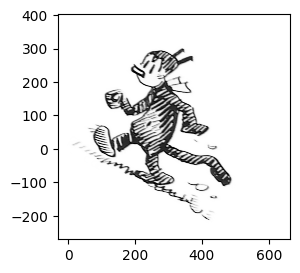

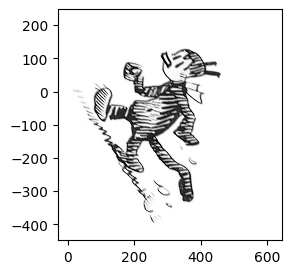

In [4]:
def plot_rotated_krazy_kat(X, alpha):
    rotation_matrix = Rot(alpha)
    rotated_X = X @ rotation_matrix
    # plot the rotated figure!
    img = imread(r'C:\Users\pc\OneDrive\바탕 화면\INFO 371\jupyter\data\krazy-kat.png')
    fig = plt.figure(figsize=(3,3))
    ax = fig.add_subplot(1,1,1)
    ax.scatter(rotated_X[:,0], rotated_X[:,1], c=img.ravel(), marker='.', cmap="Greys_r")
    ax.set_aspect('equal')
    plt.show()
# I will rotate the hat both 30 degrees and 60 degrees
plot_rotated_krazy_kat(X, alpha=30)
plot_rotated_krazy_kat(X, alpha=60)

**1.2 Image stretch**

**1. what should be the dimension of Sy(α)?** <br>
It should be 2 * 2 matrix indicating that it has 2 rows and 2 columns. <br>
It's because A is 3 by 2 matrix and to stretch the matrix which is to create another 3 by 2 matrix with modified values using matrix muliplication we should multiply 2 by 2 matrix.

In [5]:
# 2.
np.array([[1, 0], [0, 3/2]])

array([[1. , 0. ],
       [0. , 1.5]])

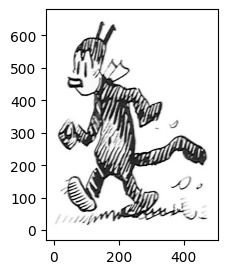

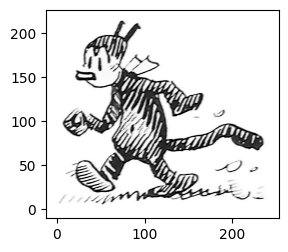

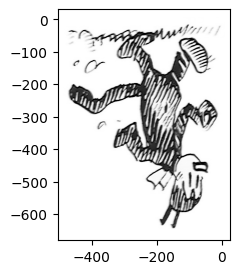

In [6]:
# 3. - stretch krazt kat image
stretch_1 = np.array([[1, 0], [0, 3/2]]) # α > 1
stretch_2 = np.array([[0.5, 0], [0, 0.5]]) # α < 1
stretch_3 = np.array([[-1, 0], [0, -3/2]]) # α < 0
def strech_krazy_kat(stretch):
    img = imread(r'C:\Users\pc\OneDrive\바탕 화면\INFO 371\jupyter\data\krazy-kat.png')
    
    # note: rows * columns (not width * height!)
    ## create coordinate matrix
    xx, yy = np.meshgrid(np.arange(img.shape[1]), np.arange(img.shape[0], 0, -1))
    X = np.column_stack((xx.ravel(), yy.ravel()))
    stretched_X = X @ stretch
    fig = plt.figure(figsize=(3,3))
    ax = fig.add_subplot(1,1,1)
    ax.scatter(stretched_X[:,0], stretched_X[:,1], c=img.ravel(), marker='.', cmap="Greys_r")
    ax.set_aspect('equal')
    plt.show()
strech_krazy_kat(stretch_1)
strech_krazy_kat(stretch_2)
strech_krazy_kat(stretch_3)

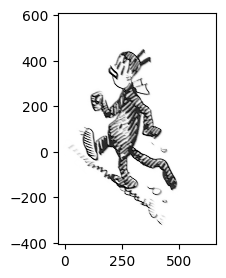

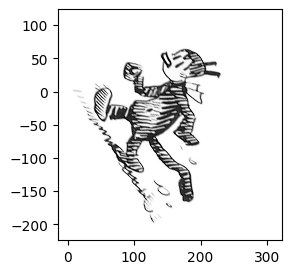

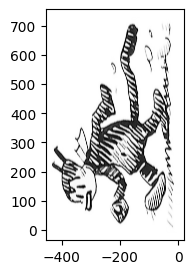

In [7]:
# 4. show and explain how to combine stretch and rotation
# 3. - stretch krazt kat image
stretch_1 = np.array([[1, 0], [0, 3/2]]) # α > 1
stretch_2 = np.array([[0.5, 0], [0, 0.5]]) # α < 1
stretch_3 = np.array([[-1, 0], [0, -3/2]]) # α < 0

def strech_and_rotate_krazy_kat(X, stretch, alpha):
    img = imread(r'C:\Users\pc\OneDrive\바탕 화면\INFO 371\jupyter\data\krazy-kat.png')
    ## create coordinate matrix
    xx, yy = np.meshgrid(np.arange(img.shape[1]), np.arange(img.shape[0], 0, -1))
    X = np.column_stack((xx.ravel(), yy.ravel()))
    rotation_matrix = Rot(alpha)
    rotated_X = X @ rotation_matrix # rotate matrix
    rotated_stretched_X = rotated_X @ stretch # stretch the rotated matrix
    fig = plt.figure(figsize=(3,3))
    ax = fig.add_subplot(1,1,1)
    ax.scatter(rotated_stretched_X[:,0], rotated_stretched_X[:,1], c=img.ravel(), marker='.', cmap="Greys_r")
    ax.set_aspect('equal')
    plt.show()
strech_and_rotate_krazy_kat(X, stretch_1, alpha=30)
strech_and_rotate_krazy_kat(X, stretch_2, alpha=60)
strech_and_rotate_krazy_kat(X, stretch_3, alpha=90)

You can easily combine stretch and rotation by doing matrix mutiplication twice. <br>
First, I did matrix multiplication with X and the rotation_matrix calculated from the Rot function to create a rotated_X. Then I did matrix multiplication on the rotated_X with stretch matrix to create a matrix that is rotated and stretched at the same time. If you plot that final matrix you will get the image that is both streched and rotated.

### 2. Implement a Perceptron

**2.1 Warming Up**

0.6575


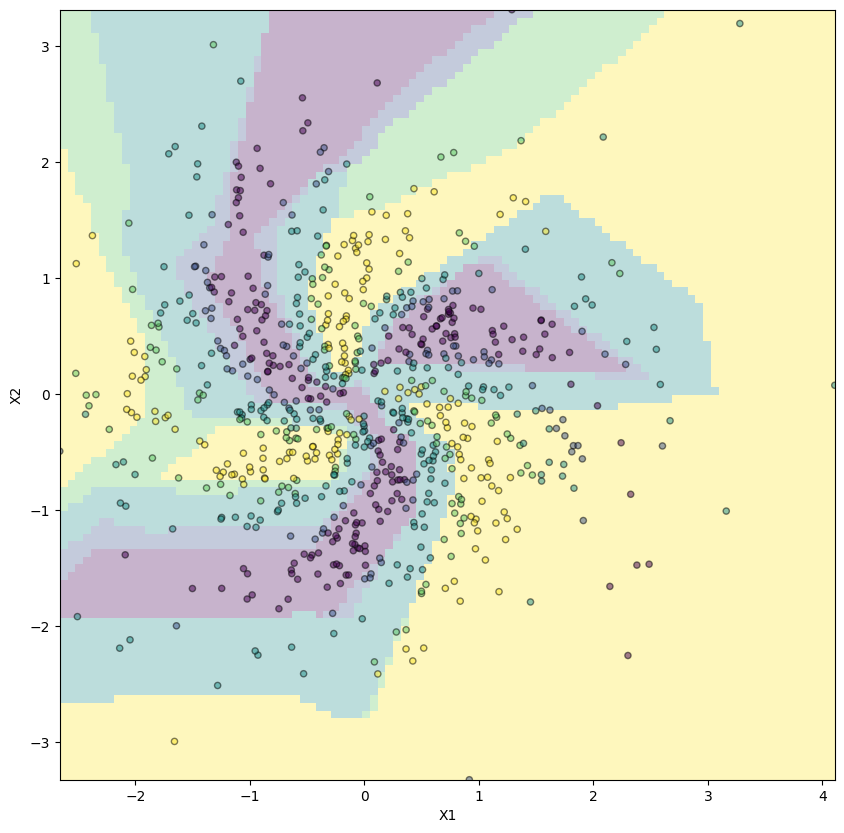

In [8]:
# 2.1.1 - create and plot the data
from sklearn.model_selection import train_test_split
import pandas as pd
np.random.seed(2)
n = 800 # number of data points
x1 = np.random.normal(size=n)
x2 = np.random.normal(size=n)
X = np.column_stack((x1, x2)) # design matrix

## Now compute color
alpha = np.arctan2(x2, x1)
r = np.sqrt(x1**2 + x2**2)
c1 = np.sin(3*alpha + 2*r)
c2 = np.cos(3*alpha + 2*r)
## cut the sum of a sin and cosine into 4 parts
category = pd.cut(c1 + c2,
bins=[-1.5, -1.1, -0.6, 0.6, 1.1, 1.5],
labels=[1, 2, 3, 4, 5])
y = category.astype(int)

# train the model to assign color depending on the location
np.random.seed(42)
from sklearn.neural_network import MLPClassifier
m = MLPClassifier(hidden_layer_sizes= (5,6,7), max_iter= 10000)
m.fit(X, y)
print(m.score(X, y)) # accuracy

# decision boundary plot
def dbPlot(m, X, y, nGrid=100):
    """ 
    m: fitted model (perceptron or any other)
    X: design matrix, used to plot dots
    y: outcome vector, used to color dots
    """
    ## Predict: take this code as black box
    range1 = np.linspace(X[:,0].min(), X[:,0].max(), nGrid)
    range2 = np.linspace(X[:,1].min(), X[:,1].max(), nGrid)
    (xx1, xx2) = np.meshgrid(range1, range2)
    Xgrid = np.column_stack((xx1.ravel(), xx2.ravel()))
    yhat = m.predict(Xgrid)
    plt.figure(figsize=(10,10))
    ## plot the predicted values on grid as an image
    plt.imshow(yhat.reshape((nGrid,nGrid)),
               alpha=0.3, extent=[xx1.min(), xx1.max(), xx2.min(), xx2.max()],
               origin='lower', aspect='auto')
    ## add the actual values
    plt.scatter(X[:,0], X[:,1], c=y, s=20, alpha=0.5, edgecolor="k")
    plt.xlabel("X1")
    plt.ylabel("X2")
    _ = plt.show()
dbPlot(m, X, y)

In [9]:
# 2.1.2
# There are 5 different colors in the dataset.
np.unique(y)

array([1, 2, 3, 4, 5])

In [10]:
# 2.1.3 - extract all the weights and biases from the model
weights = m.coefs_
w1, w2, w3, w4 = weights
bias = m.intercepts_
b1, b2, b3, b4 = bias
print("number of biases:", np.sum([b.size for b in m.intercepts_]))
print("number of weights:", np.sum([w.size for w in m.coefs_]))
# X.shape
# y.shape
# np.unique(y)

number of biases: 23
number of weights: 117


(a) input layer 800 neurons with a first hidden layer 5 neurons <br>
    => dimension (800, 5) <br>
(b) output layer corresponds to the # of classes. <br>
    The dimension would be (7, 5) condiering that the last hidden layer size is 7. <br>
(c) 32. There would be 32 nodes in that layer.

**2.1.4** <br>
It's using ReLU as the activation function for the hidden layers. Specifically it can be written as max(x, 0) = 0 if x < 0, and x if x >= 0.

**2.1.5**
In output layer, it's using Softmax function(Logistic function). It's very useful in a sense that xi value is always positive. 
>for my reference: So, softmax is a transformation that converts all kind of inputs into valid probabilities, this is why it's most popular output layer activation function for categorization problems.

#### 2.2 Implement

In [37]:
# 2.2.1 - implement ReLU function using only numpy tools!
def relu(x):
    return np.maximum(0, x)

In [38]:
# 2.2.2 - implement softmax function using only numpy tools. 
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

In [41]:
# 2.2.3 - implement the perceptron
# hidden_layers = X @ weights + bias
X = np.array([[-1, -3], [-2, -2], [0, -2]])
def perceptron(X):
    h1 = relu(X @ w1 + b1)
    h2 = relu(h1 @ w2 + b2)
    h3 = relu(h2 @ w3 + b3)
    output = softmax(h3 @ w4 + b4)
    return output
perceptron(X)

array([[2.07999555e-07, 7.46947467e-04, 2.39107732e-02, 1.46242221e-01,
        8.29099850e-01],
       [1.18855688e-01, 2.08564568e-01, 6.59629855e-01, 1.29113071e-02,
        3.85819166e-05],
       [6.99273544e-03, 1.07942304e-01, 8.12649330e-01, 6.00854659e-02,
        1.23301643e-02]])

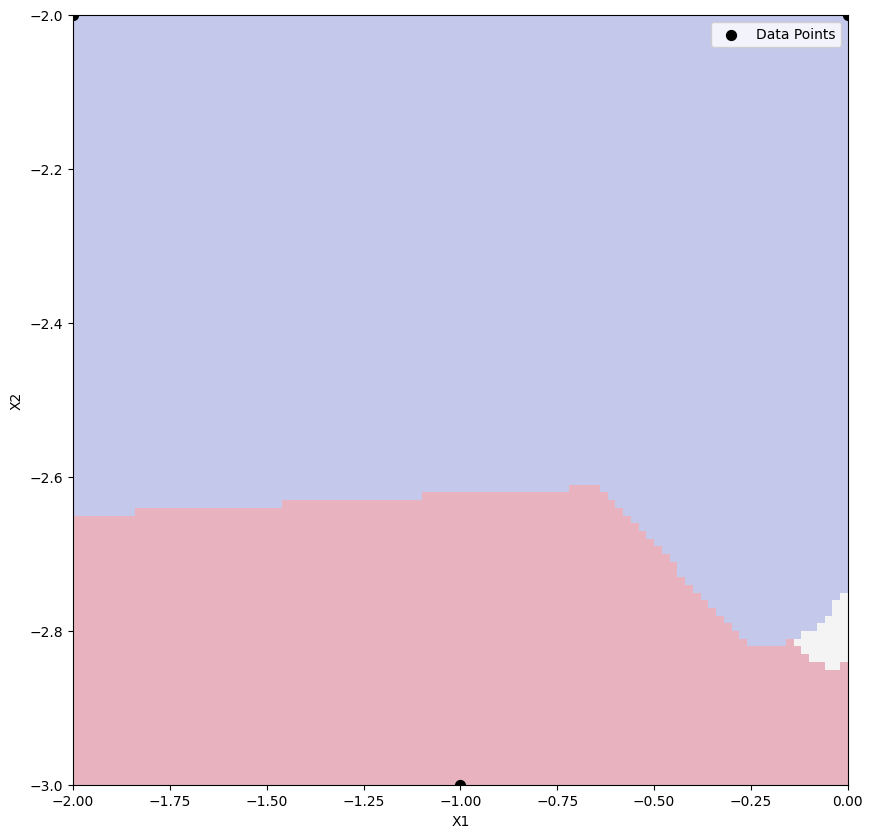

In [49]:
# 2.2.4
# Tweak the dbPLot function
def dbPlot(X, perceptron, nGrid=100):
    """ 
    X: design matrix, used to plot dots
    perceptron_func: perceptron function that returns class probabilities
    """
    range1 = np.linspace(X[:,0].min(), X[:,0].max(), nGrid)
    range2 = np.linspace(X[:,1].min(), X[:,1].max(), nGrid)
    xx1, xx2 = np.meshgrid(range1, range2)
    Xgrid = np.column_stack((xx1.ravel(), xx2.ravel()))
    yhat = perceptron(Xgrid)
    yhat_labels = np.argmax(yhat, axis=1)  # predicted class labels
    
    plt.figure(figsize=(10,10))
    # plot the predicted values on grid as an image
    plt.imshow(yhat_labels.reshape((nGrid,nGrid)),
               alpha=0.3, extent=[xx1.min(), xx1.max(), xx2.min(), xx2.max()],
               origin='lower', aspect='auto', interpolation='nearest', cmap='coolwarm')
    # add the actual values
    plt.scatter(X[:,0], X[:,1], c='black', s=50, label='Data Points')
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend()
    plt.show()
dbPlot(X, perceptron)